# Problem Set 4
By: Bethany Bailey

# DSGE Exercises

## 1)

For the Brock and Mirman model, the value of A in the policy function can be found using the Euler equation and "guessing" the policy function. Thus, we get:

$$ \frac{1}{(1-A)e^{Zt}K_{t}^a} = \beta E_{t}\Big[\frac{ae^{Zt+1}K_{t+1}^{a-1}}{e^{Zt+1}K_{t+1}^a - Ae^{Zt+1}K_{t+1}^a} \Big]$$ 

With algebra, we get $K_{t+1} = \beta a e^{Zt}K_{t}^a$.

Finally, we get our value for A, $A = \beta a$.

## 2)
The characterizing equations are as follows:

$$c_t = (1-\tau)[w_t l_t + (r_t - \delta) k_t] + k_t + T_t - k_{t+1}$$

$$\frac{1}{c_t} = \beta \mathbb{E}_{t}\left[\frac{1}{c_{t+1}}[(r_{t+1} - \delta)(1-\tau)+1]\right]$$

$$\frac{a}{1-l_t} = \frac{1}{c_t} w_t(1-\tau)$$

$$r_t = ae^{z_{t}}k_{t}^{a-1}l_{t}^{1-a}$$

$$w_t = (1-a)e^{z_{t}}k_{t}^{a}l_{t}^{-a}$$

$$\tau[w_tl_t + (r_t - \delta)k_t] = T_t$$

$$z_t = (1-\rho)\bar{z} + \rho z_{t-1} + \epsilon_{t}$$

$$\epsilon_{t} \sim iid (0, \sigma_z)$$

I don't think we will be able to use the same trick to solve for the policy function, since in this case labor supply is endogenous.

## 3)

$$c_t = (1-\tau)[w_tl_t + (r_t - \delta)k_t] + k_t + T_t - k_{t+1}$$
$$\frac{1}{c_t^{\gamma}} = \beta \mathbb{E}_{t}\left[\frac{1}{c_{t+1}^{\gamma}}[(r_{t+1} - \delta)(1-\tau)+1]\right]$$
$$\frac{a}{1-l_t} = \frac{1}{c_t^{\gamma}} w_t(1-\tau)$$
$$r_t = ae^{z_{t}}k_{t}^{a-1}l_{t}^{1-a}$$
$$w_t = (1-a)e^{z_{t}}k_{t}^{a}l_{t}^{-a}$$
$$\tau[w_tl_t + (r_t - \delta)k_t] = T_t$$
$$z_t = (1-\rho)\bar{z} + \rho z_{t-1} + \epsilon_{t}$$
$$\epsilon_{t} \sim iid (0, \sigma_z)$$

## 4)

$$c_t = (1-\tau)[w_tl_t + (r_t - \delta)k_t] + k_t + T_t - k_{t+1}$$
$$\frac{1}{c_t^{\gamma}} = \beta \mathbb{E}_{t}\left[\frac{1}{c_{t+1}^{\gamma}}[(r_{t+1} - \delta)(1-\tau)+1]\right]$$
$$\frac{a}{(1-l_t)^{\epsilon}} = \frac{1}{c_t^{\gamma}} w_t(1-\tau)$$
$$r_t = ae^{z_{t}}k_{t}^{\eta-1}[ak_{t}^{\eta} + (1-a)l_{t}^{\eta}]^\frac{1-\eta}{\eta}$$
$$w_t = (1-a)e^{z_{t}}l_{t}^{\eta-1}[ak_{t}^{\eta} + (1-a)l_{t}^{\eta}]^\frac{1-\eta}{\eta}$$
$$\tau[w_tl_t + (r_t - \delta)k_t] = T_t$$
$$z_t = (1-\rho)\bar{z} + \rho z_{t-1} + \epsilon_{t}$$
$$\epsilon_{t} \sim iid (0, \sigma_z)$$

## 5)

$$c_t = (1-\tau)[w_tl_t + (r_t - \delta)k_t] + k_t + T_t - k_{t+1}$$
$$\frac{1}{c_t^{\gamma}} = \beta \mathbb{E}_{t}\left[\frac{1}{c_{t+1}^{\gamma}}[(r_{t+1} - \delta)(1-\tau)+1]\right]$$
$$l_t = 1$$
$$r_t = ak_{t}^{a-1}(l_te^{z_t})^{1-a}$$
$$w_t = (1-a)k_t^{a}(l_te^{z_t})^{-a}e^{z_t}$$
$$\tau[w_tl_t + (r_t - \delta)k_t] = T_t$$
$$z_t = (1-\rho)\bar{z} + \rho z_{t-1} + \epsilon_{t}$$
$$\epsilon_{t} \sim iid (0, \sigma_z)$$

The steady state versions of these equations are:
$$\bar{c} = (1-\tau)[\bar{w} + (\bar{r} - \delta)\bar{k}] + \bar{T}$$
$$1 = \beta \mathbb E_{t}[(\bar{r} - \delta)(1-\tau)+1]$$
$$\bar{r} = a\bar{k}^{a-1}e^{\bar{z}^{1-a}}$$
$$\bar{w} = (1-a)\bar{k}^ae^{\bar{z}^{1-a}}$$
$$\tau[\bar{w} + (\bar{r} - \delta)\bar{k}] = \bar{T}$$

And the algebraic steady state value of k is:

$$k^{*} = \big[\frac{\beta(1-\tau)a}{(1-\beta) + \delta\beta(1-\tau)}\big]^{\frac{1}{1-a}}$$

In [1]:
import numpy as np
from scipy.optimize import root

In [2]:
# Parameters
γ = 2.5
β = 0.98
α = 0.4
δ = 0.1
z = 0
τ = 0.05

Algebraic solution:

In [3]:
k_bar = (((1 - β) / (α * β * (1 - τ))) + (δ / α))**(1/(α-1))
k_bar

7.287497950692988

In [7]:
# Steady state output
y_bar = k_bar**α
y_bar

array([ 2.21325461])

In [8]:
# Steady state investment
i_bar = δ * k_bar
i_bar

array([ 0.7287498])

Numerical solution:

In [4]:
def solve_ss_num(k, γ, β, α, δ, z, τ):
    r = α * k**(α - 1) * (np.exp(z))**(1 - α)
    return β * ((r - δ) * (1 - τ) + 1) - 1

In [6]:
k_bar = root(solve_ss_num, 1, args=(γ, β, α, δ, z, τ)).x
k_bar

array([ 7.28749795])

In [9]:
# Steady state output
k_bar**α

array([ 2.21325461])

In [10]:
# Steady state investment
i_bar = δ * k_bar
i_bar

array([ 0.7287498])

## 6)

$$c_t = (1-\tau)[w_tl_t + (r_t - \delta)k_t] + k_t + T_t - k_{t+1}\\
\frac{1}{c_t^{\gamma}} = \beta \mathbb E_{t}\left[\frac{1}{c_{t+1}^{\gamma}}[(r_{t+1} - \delta)(1-\tau)+1]\right]\\
\frac{a}{(1-l_t)^{\epsilon}} = \frac{1}{c_t^{\gamma}} w_t(1-\tau)\\
r_t = ak_{t}^{a-1}(l_te^{z_t})^{1-a}\\
w_t = (1-a)k_t^{a}(l_te^{z_t})^{-a}e^{z_t}\\
\tau[w_tl_t + (r_t - \delta)k_t] = T_t\\
z_t = (1-\rho)\bar{z} + \rho z_{t-1} + \epsilon_{t}\\
\epsilon_{t} \sim iid (0, \sigma_z)$$

In [11]:
# Set parameters
γ = 2.5
ξ = 1.5
β = 0.98
α = 0.4
a = 0.5
δ = 0.1
z = 0
τ = 0.05

In [12]:
def solve_ss(params, γ, ξ, β, α, a, δ, z, τ):
    k, l = params
    w = (1 - α) * k**α * (l * np.exp(z))**(1 - α)  # find SS wage
    r = α * k**(α - 1) * (l * np.exp(z))**(1 - α)  # find SS interest rate
    T = τ * (w * l + (r - δ) * k)
    c = (1 - τ) * (w * (r - δ) * k) + T
    eq1 = β * ((r - δ) * (1 - τ) + 1) - 1
    eq2 = c**(-γ) * w * (1 - τ) - a * (1 - l)**(-ξ)
    return eq1, eq2

In [14]:
# Capital and labor steady state
ss = root(solve_ss, 0.5 * np.ones(2), args=(γ, ξ, β, α, a, δ, z, τ))
k_bar, l_bar, = ss.x
k_bar, l_bar

(6.8991246724247555, 0.94670691081538927)

In [16]:
# Steady state output
y_bar = k_bar**α * l_bar**(1 - α) * np.exp(z)
y_bar

2.0953034383850278

In [17]:
# Steady state investment
i_bar = δ * k_bar
i_bar

0.68991246724247557

# Linearization Exercises

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1)

In [19]:
α = 0.35
β = 0.98
ρ_z = 0.95
σ = 0.02
A = α * β
K = A**(1/(1 - α))

In [20]:
F = (α * K**(α - 1)) / (K**α - K)
G = -(α * K**(α - 1) * (α + K**(α - 1))) / (K**α - K)
H = (α**2 * K**(2 * (α - 1))) / (K**α - K)
L = -(α * K**(2 * (α - 1))) / (K**α - K)
M = (α**2 * K**(2 * (α - 1))) / (K**α - K)

P = (-G - np.sqrt(G**2 - 4 * F * H)) / (2 * F)
Q = -(L * ρ_z + M) / (F * ρ_z + F * P + G)

# Create K and z grids
K_t_grid = np.linspace(1.5, 10)
z_grid = np.linspace(-1, 1)

# Create a meshgrid
K_t, z = np.meshgrid(K_t_grid, z_grid)

# Calculate K_prime across the grid
K_prime = lambda K, Z: K + P * (K_t - K) + Q * z

y = K_prime(K_t, z)

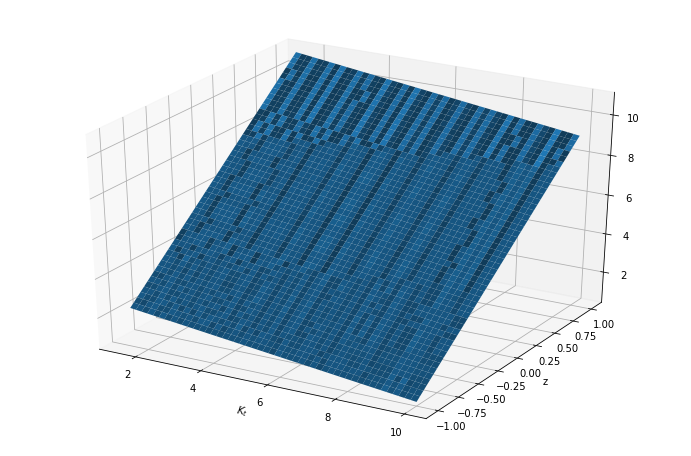

In [21]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(K_t, z, y.T)
ax.set(xlabel='$K_t$', ylabel='z')
plt.show()